In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\Workspace\Pri\data science and ML practice\jupyter\DataBases\kaggle_dataset\\test.csv')

In [3]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [4]:
df.shape

(1459, 80)

In [5]:
null_var = df.isnull().sum()/df.shape[0]*100


In [6]:
find_col = null_var[ null_var > 20 ].keys()   
print(find_col)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [7]:
drop_col = df.drop( columns= find_col)

In [8]:
df.shape

(1459, 80)

In [9]:
drop_col.shape

(1459, 75)

In [10]:
drop_col_num = drop_col.select_dtypes( include= ['int64','float64'])
drop_col_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0       468.0       144.0      270.0   
1       1958          1958       108.0       923.0         0.0      406.0   
2       1997          1998         0.0       791.0         0.0      137.0   
3       1998          1998        20.0       602.0         0.0      324.0   
4       1992          1992         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       1961.0         1.0       730.0         140            0   
1           0       1958.0         1.0       312.0         393           36   
2           1       1997.0         2.0       482.0         212           34   
3           1       1998.0         2.0       470.0         360           36   
4           0       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0          120         0        0       6    2010  
1              0          0            0         0    12500       6    2010  
2              0          0            0         0        0       3    2010  
3              0          0            0         0        0       6    2010  
4              0          0          144         0        0       1    2010

In [11]:
drop_col_num.shape

(1459, 37)

In [12]:
drop_col_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

# please remove or correct manually which is null 1 or 2 in dataset

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
GarageArea         1

In [13]:
missing_num_val = [var for var in drop_col_num.columns 
                         if drop_col_num[var].isnull().sum() > 2]
missing_num_val

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
drop_col_num[missing_num_val][drop_col_num[missing_num_val].isnull().any(axis=1)]

LotFrontage  MasVnrArea  GarageYrBlt
6             NaN         0.0       1992.0
40            NaN      1159.0       2000.0
41            NaN         0.0       2003.0
45            NaN       120.0       1967.0
47            NaN         0.0       1978.0
52            NaN         0.0       1964.0
53           98.0       144.0          NaN
59            NaN       150.0       1959.0
71           56.0         0.0          NaN
75            NaN         0.0       1962.0
79          100.0         0.0          NaN
82            NaN         0.0       1928.0
92           60.0         0.0          NaN
96           60.0         0.0          NaN
98            NaN         0.0          NaN
100          72.0        72.0          NaN
103           NaN         0.0       1978.0
105           NaN         0.0       1977.0
107           NaN       288.0       1978.0
113           NaN         0.0       1964.0
119           NaN         0.0       1997.0
124           NaN       170.0       2003.0
130          64.0         0.0          NaN
132           NaN         0.0       1939.0
133          60.0         0.0          NaN
134          51.0         0.0          NaN
146           NaN         0.0       1976.0
152           NaN         0.0       2001.0
154          21.0         0.0          NaN
155          21.0         0.0          NaN
167           NaN       188.0       2003.0
174           NaN         0.0       1994.0
177           NaN       256.0       1978.0
179           NaN       229.0       1980.0
182           NaN         0.0       2000.0
183           NaN         0.0       2002.0
184           NaN       161.0       1975.0
187           NaN         0.0       1970.0
188           NaN       178.0       1971.0
199           NaN       165.0       1966.0
229           NaN         0.0       2003.0
230           NaN         0.0       2003.0
231           NaN         NaN       2002.0
235           NaN       210.0       1999.0
238           NaN       634.0       1994.0
240           NaN       372.0       1993.0
246          90.0         NaN       2008.0
257          63.0         0.0          NaN
261          63.0         0.0          NaN
268           NaN       141.0       1986.0
271           NaN         0.0       1982.0
272           NaN         0.0       1961.0
273           NaN         0.0       1965.0
274           NaN         0.0       1963.0
276           NaN       115.0       1980.0
277           NaN       196.0       1991.0
279           NaN       280.0       2008.0
280           NaN       252.0       2008.0
283           NaN       450.0       1977.0
286           NaN         0.0       1974.0
290           NaN       283.0       1977.0
294           NaN       509.0       1971.0
297           NaN       160.0       1982.0
298           NaN        70.0       1956.0
301           NaN         0.0       1965.0
308           NaN       128.0       1960.0
327          90.0         0.0          NaN
348          90.0         0.0          NaN
350          63.0         0.0          NaN
351          56.0         0.0          NaN
359           NaN         0.0          NaN
362          72.0         0.0          NaN
363           NaN         0.0       1923.0
371          50.0         0.0          NaN
373           NaN         0.0       1915.0
374          41.0       188.0          NaN
376          86.0         0.0          NaN
379          60.0         0.0          NaN
380           NaN         0.0       1960.0
383           NaN        23.0       1978.0
386           NaN       366.0       1956.0
387           NaN         0.0          NaN
388           NaN         0.0       1980.0
401           NaN        23.0       2000.0
402           NaN        23.0       2000.0
403           NaN        23.0       2000.0
412           NaN         0.0       1992.0
418           NaN        76.0       1978.0
421           NaN       198.0       2003.0
422          70.0         NaN       2002.0
423           NaN         0.0       2001.0
425           NaN       164.0       2002.0
433    

In [15]:
df['LotFrontage'].unique()

array([ 80.,  81.,  74.,  78.,  43.,  75.,  nan,  63.,  85.,  70.,  26.,
        21.,  24., 102.,  94.,  90.,  79., 110., 105.,  41., 100.,  67.,
        60.,  73.,  92.,  84.,  39.,  88.,  25.,  30.,  57.,  68.,  98.,
       120.,  87., 119.,  65.,  56.,  69.,  50.,  53.,  52.,  51.,  72.,
        86., 124.,  44.,  83.,  64.,  82.,  38.,  89.,  35.,  58.,  66.,
        93.,  31.,  76.,  28.,  61.,  95., 129.,  59.,  77.,  96.,  47.,
        34., 117.,  48.,  62.,  42., 106., 112.,  32., 115.,  71.,  45.,
       109., 113., 125., 101., 104., 108., 130., 135.,  36.,  55., 136.,
        97.,  91.,  37.,  22., 103.,  99.,  40., 123.,  54., 107., 150.,
       160., 195., 128.,  33., 118., 134., 155., 126.,  46., 149., 200.,
       121., 131., 114.,  49., 133., 140.])

In [16]:
df['LotConfig'].unique()

array(['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [17]:
df[df.loc[:,'LotConfig']=="Inside"]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pave   NaN      Reg   
51    1512          20       RL         88.0     9680   Pave   NaN      Reg   
52    1513          80       RL          NaN    10600   Pave  Pave      IR1   
53    1514          90       RL         98.0    13260   Pave   NaN      IR1   
54    1515          50       RL         68.0     9724   Pave   NaN      Reg   
56    1517          85       RL         75.0    11380   Pave   NaN      IR1   
58    1519          20       RL         70.0     8197   Pave   NaN      Reg   
59    1520          20       RL          NaN     8050   Pave   NaN      IR1   
60    1521          20       RL         87.0    10725   Pave   NaN      IR1   
61    1522          20       RL         80.0    10032   Pave   NaN      Reg   
62    1523          50       RL         60.0     8382   Pave   NaN      Reg   
63    1524          20       RL         60.0    10950   Pave   NaN      Reg   
65    1526         190       RL         70.0    13587   Pave   NaN      Reg   
67    1528          50       RL         60.0     8064   Pave   NaN      Reg   
69    1530          20       RL         80.0     9760   Pave   NaN      Reg   
71    1532          30       RM         56.0     4485   Pave  Grvl      Reg   
72    1533          20       RM         69.0     5805   Pa

In [18]:
df[df.loc[:,'LotConfig']=="Inside"]['LotFrontage']

0        80.0
2        74.0
3        78.0
4        43.0
6         NaN
7        63.0
8        85.0
11       21.0
12       21.0
15      102.0
17       90.0
18       79.0
19      110.0
21       41.0
23       43.0
24       67.0
25       63.0
27       73.0
28       92.0
30       70.0
33       85.0
34       88.0
36       39.0
37       30.0
38       24.0
39       24.0
42       57.0
43       68.0
44       80.0
45        NaN
46       80.0
47        NaN
48       80.0
49       80.0
51       88.0
52        NaN
53       98.0
54       68.0
56       75.0
58       70.0
59        NaN
60       87.0
61       80.0
62       60.0
63       60.0
65       70.0
67       60.0
69       80.0
71       56.0
72       69.0
74       69.0
75        NaN
76       68.0
78       50.0
79      100.0
80       60.0
83       50.0
84       50.0
85       50.0
87       50.0
88       52.0
89       52.0
90       51.0
91       57.0
92       60.0
93       52.0
94      100.0
95       72.0
96       60.0
97       65.0
98        NaN
100   

# 45        NaN            ...........................this replace with mean() value

In [19]:
df[df.loc[:,'LotConfig']=="Inside"]['LotFrontage'].replace(np.nan, df[df.loc[:,'LotConfig']=="Inside"]['LotFrontage'].mean())

0        80.000000
2        74.000000
3        78.000000
4        43.000000
6        66.709746
7        63.000000
8        85.000000
11       21.000000
12       21.000000
15      102.000000
17       90.000000
18       79.000000
19      110.000000
21       41.000000
23       43.000000
24       67.000000
25       63.000000
27       73.000000
28       92.000000
30       70.000000
33       85.000000
34       88.000000
36       39.000000
37       30.000000
38       24.000000
39       24.000000
42       57.000000
43       68.000000
44       80.000000
45       66.709746
46       80.000000
47       66.709746
48       80.000000
49       80.000000
51       88.000000
52       66.709746
53       98.000000
54       68.000000
56       75.000000
58       70.000000
59       66.709746
60       87.000000
61       80.000000
62       60.000000
63       60.000000
65       70.000000
67       60.000000
69       80.000000
71       56.000000
72       69.000000
74       69.000000
75       66.709746
76       68.

# 45       66.709746   ...................... with mean() value

In [20]:
#  now for all value of 

In [21]:
df.isnull().sum().head(5)                                 #  LotFrontage    227

Id               0
MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
dtype: int64

In [36]:
df_copy = df.copy()
   
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig']==var_class]["LotFrontage"].replace(np.nan, df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].mean()))    

In [37]:
df_copy.isnull().sum().head(5)                       # LotFrontage    0

Id             0
MSSubClass     0
MSZoning       4
LotFrontage    0
LotArea        0
dtype: int64

In [24]:
#  NOW  "LotFrontage"   IS NOT NULL        

In [25]:
# KitchenQual Exterior2nd

In [57]:
df[df[['KitchenQual']].isnull().any(axis=1)]        

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
95  1556          50       RL         72.0    10632   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
95         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
95       Norm     1Fam     1.5Fin            5            3       1917   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
95          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
95         0.0        TA        TA     BrkTil       Gd       Fa           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
95          Unf         0.0          Unf         0.0      689.0        689.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
95    GasA        Gd          N      SBrkr       725       499             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
95       1224           0.0           0.0         1         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
95             1         NaN             6        Mod           0         NaN   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
95     Detchd       1917.0          Unf         1.0       180.0         Fa   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
95         Fa          N           0            0            248          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
95            0         0    NaN   NaN         NaN        0       1    2010   

   SaleType SaleCondition  
95      COD        Normal

In [58]:
df_copy[df_copy[['Exterior2nd']].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691       Norm     1Fam     1Story            5            7       1940   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691          2007      Flat  Tar&Grv         NaN         NaN       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
691         0.0        TA        TA      PConc       TA       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
691          ALQ      1035.0          Unf         0.0      545.0       1580.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691    GasA        Ex          Y      SBrkr      1518         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691       1518           1.0           0.0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691             1          Fa             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
691          Gd        NaN      1946.75          NaN         0.0         0.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
691        NaN        NaN          Y           0           39              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
691          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
691       1    2008       WD        Normal

In [28]:
missing_num_val = [var for var in drop_col_num.columns 
                         if drop_col_num[var].isnull().sum() > 2]
missing_num_val

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [29]:
print(missing_num_val)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


# mean() for all

In [59]:
df_copy_mean = df.copy()

missing_num_val = [ 'LotFrontage','MasVnrArea', 'GarageYrBlt']#

cat_vars =['LotConfig','Exterior2nd','KitchenQual']#

for var_class in df['LotConfig'].unique():
    df_copy_mean.update(df[df.loc[:,'LotConfig']==var_class]["LotFrontage"].replace(np.nan, df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].mean()))    

for var_class in df['Exterior2nd'].unique():
    df_copy_mean.update(df[df.loc[:,'Exterior2nd']==var_class]['MasVnrArea'].replace(np.nan, df[df.loc[:,'Exterior2nd']==var_class]['MasVnrArea'].mean()))    
    
for var_class in df['KitchenQual'].unique():
    df_copy_mean.update(df[df.loc[:,'KitchenQual']==var_class]['GarageYrBlt'].replace(np.nan, df[df.loc[:,'KitchenQual']==var_class]['GarageYrBlt'].mean()))        
#for cat_vars,missing_num_val in zip(cat_vars,missing_num_val):
  #  for var_class in df['cat_vars'].unique():
   #     df_copy_mean.update(df[df.loc[:,'cat_vars']==var_class][missing_num_val].replace(np.nan, df[df.loc[:,'cat_vars']==var_class][missing_num_val].mean()))   

In [60]:
df_copy_mean[missing_num_val].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [44]:
df_copy_mean.shape

(1459, 80)

In [ ]:
print(missing_num_val)

In [45]:
plt.figure(figsize=(10,10))
#kde_kw=kde_kw

sns.set()




for i, vari in enumerate(missing_num_val):
    plt.subplot(2,2, i+1)
    


    sns.histplot( data=df[vari] , bins=20 ,edgecolor = "y" , kde=True, linewidth = 5,  linestyle = "--" , alpha=0.1, color='k',line_kws={'lw': 6}) 
    #sns.histplot( data=df_copy_num[vari] , bins=10,edgecolor = "orange" , kde=True, linewidth = 4 , linestyle = "--" ,alpha=0.2, color='#4682b4' ,line_kws={'lw': 8})#line_kws=None,kde= True, kde_kws={ 'color':'green' , 'linewidth' :8 } )  
    
   # plt.legend()

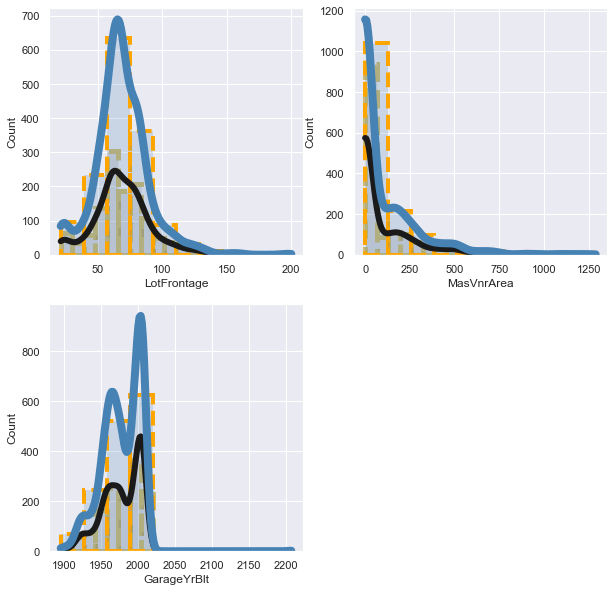

In [47]:
plt.figure(figsize=(10,10))
#kde_kw=kde_kw

sns.set()




for i, vari in enumerate(missing_num_val):
    plt.subplot(2,2, i+1)
    


    sns.histplot( data=df[vari] , bins=20 ,edgecolor = "y" , kde=True, linewidth = 5,  linestyle = "--" , alpha=0.1, color='k',line_kws={'lw': 6}) 
    sns.histplot( data=df_copy_mean[vari] , bins=10,edgecolor = "orange" , kde=True, linewidth = 4 , linestyle = "--" ,alpha=0.2, color='#4682b4' ,line_kws={'lw': 8})#line_kws=None,kde= True, kde_kws={ 'color':'green' , 'linewidth' :8 } )  
    
    #plt.legend()

# median()

In [52]:
df_copy_median = df.copy()

missing_num_val = [ 'LotFrontage','MasVnrArea', 'GarageYrBlt']#

cat_vars =['LotConfig','Exterior2nd','KitchenQual']#

for var_class in df['LotConfig'].unique():
    df_copy_median.update(df[df.loc[:,'LotConfig']==var_class]["LotFrontage"].replace(np.nan, df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].median()))    

for var_class in df['Exterior2nd'].unique():
    df_copy_median.update(df[df.loc[:,'Exterior2nd']==var_class]['MasVnrArea'].replace(np.nan, df[df.loc[:,'Exterior2nd']==var_class]['MasVnrArea'].median()))    
    
for var_class in df['KitchenQual'].unique():
    df_copy_median.update(df[df.loc[:,'KitchenQual']==var_class]['GarageYrBlt'].replace(np.nan, df[df.loc[:,'KitchenQual']==var_class]['GarageYrBlt'].median()))        


In [ ]:
missing_num_val = [var for var in drop_col_num.columns 
                         if drop_col_num[var].isnull().sum() > 2]
missing_num_val

In [56]:
df_copy_median[missing_num_val].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

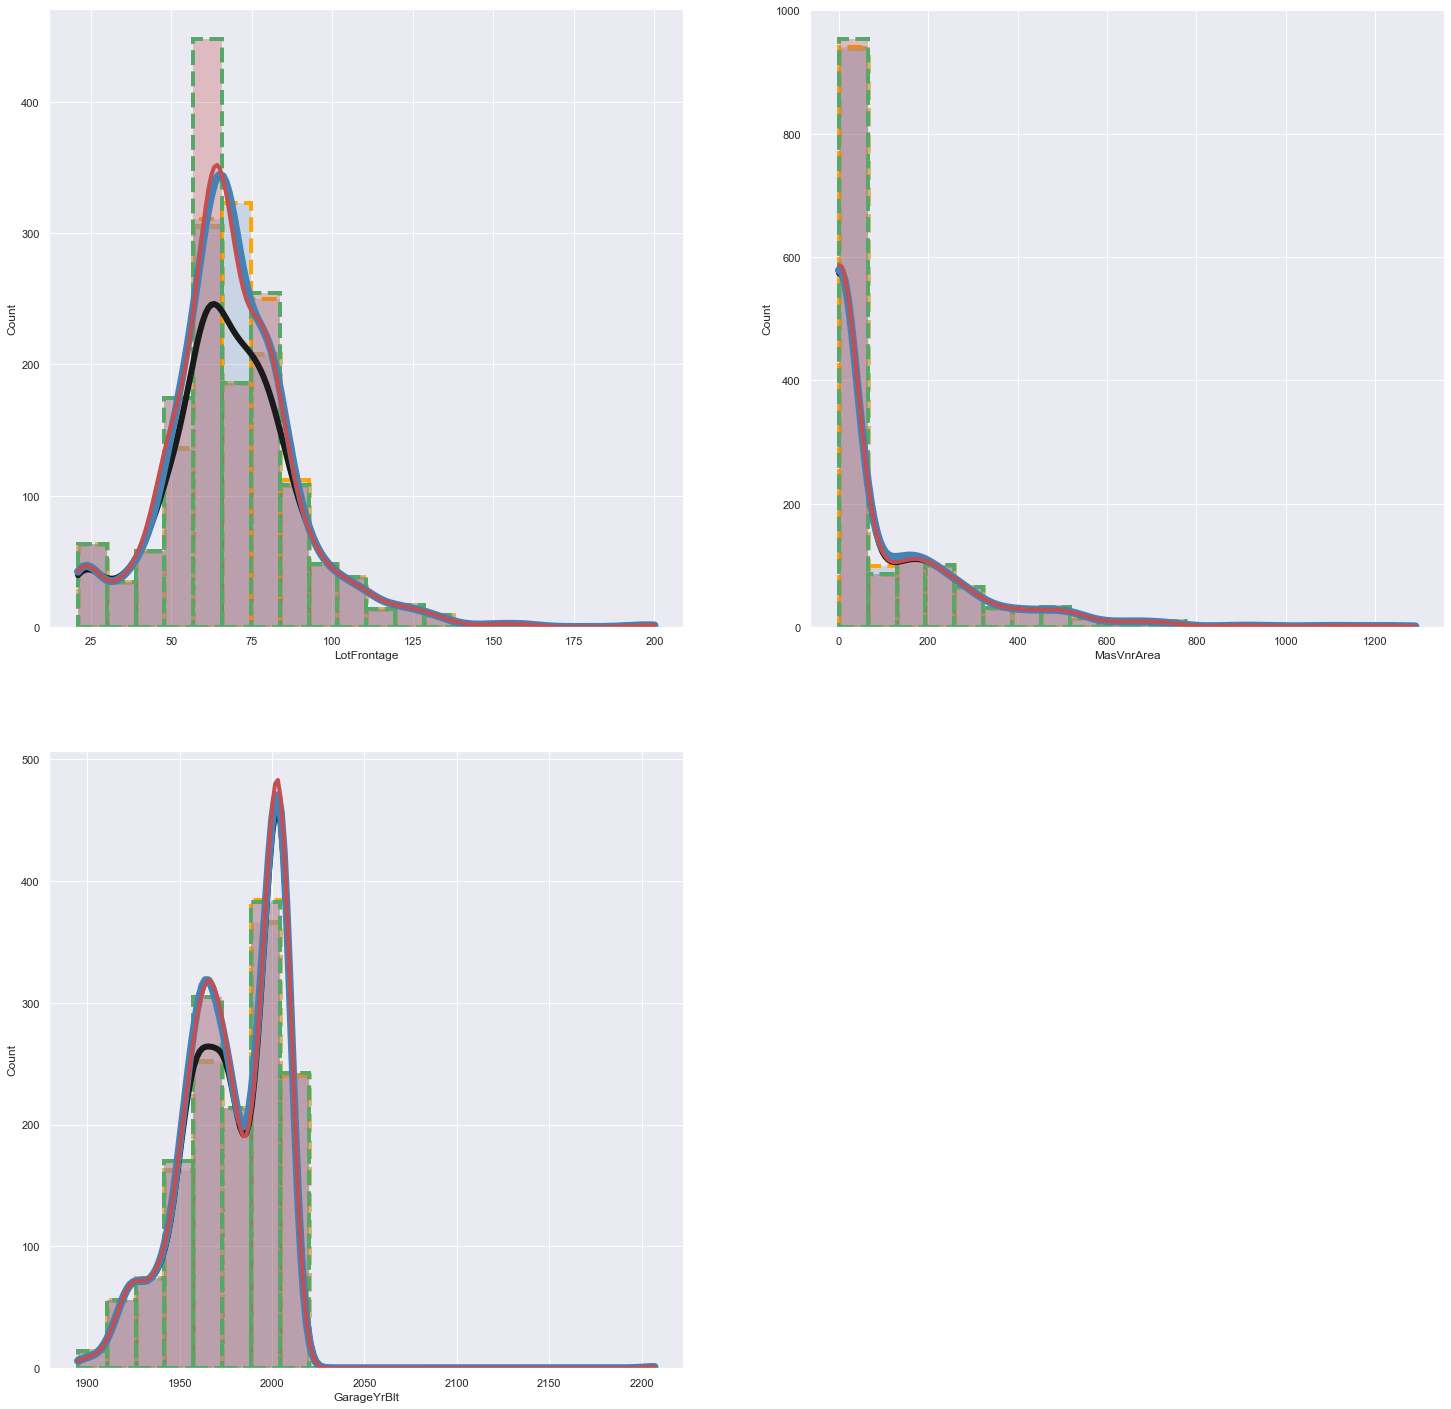

In [54]:
plt.figure(figsize=(25,25))

sns.set()

for i, var in enumerate(missing_num_val):
    plt.subplot(2,2, i+1)
    

    sns.histplot( df[var] , bins=20,edgecolor = "y" , kde=True, linewidth = 5,  linestyle = "--" , alpha=0.1, color='k',line_kws={'lw': 6} )  
    sns.histplot( df_copy_mean[var] , bins=20,edgecolor = "orange" , kde=True, linewidth = 4 , linestyle = "--" ,alpha=0.2, color='#4682b4' ,line_kws={'lw': 8})
    sns.histplot( df_copy_median[var] , bins=20 , edgecolor = "g",kde=True, linewidth = 4 , linestyle = "--" ,alpha=0.3, color='r' ,line_kws={'lw': 4} )

In [55]:
for i, var in enumerate(missing_num_val):
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(3,1,1)
    sns.boxplot( x= df[var])
    
    plt.subplot(3,1,2)
    sns.boxplot(x= df_copy_mean[var])
   
    plt.subplot(3,1,3)
    sns.boxplot(x= df_copy_median[var])